In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

#### Load the data

In [6]:
dataset=fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [10]:
len(dataset)

2

In [11]:
(trainX,trainY),(testX,testY)= dataset

In [12]:
trainX.shape #60000 examples of 28x28 images

(60000, 28, 28)

In [14]:
testX.shape #10000 examples of 28x28 images

(10000, 28, 28)

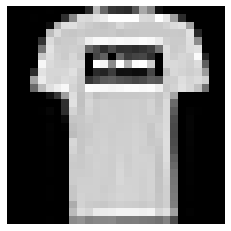

In [19]:
plt.imshow(trainX[1],cmap='gray') # image of a tshirt
plt.axis('off')
plt.show()

#### Data Preprocessing

In [25]:
y_train=to_categorical(trainY)
y_test= to_categorical(testY) #one hot encoding

In [28]:
X_train= trainX/255.0
X_test= testX/255.0 #feature scaling

In [32]:
X_train=X_train.reshape((-1,28,28,1))
X_test= X_test.reshape((-1,28,28,1))

#### Define the model architecture

In [43]:
model= Sequential()
model.add(Conv2D(filters=64,activation='relu',input_shape=(28,28,1),kernel_size=(3,3))) #activvation is combined within this layer
#no. of filters are usually chosen as a power of 2
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3)) # 30% neurons will be turned off
model.add(Conv2D(filters=32,activation='relu',kernel_size=2))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten()) #fully connected layer
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax')) #for classification into 10 categories
model.summary() #prints the summary of the model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)             

#### Compile the model

In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#### Train

In [45]:
model.fit(X_train,y_train,batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 54s 115ms/step - loss: 0.6854 - accuracy: 0.7459
Epoch 2/10
469/469 [==============================] - 54s 115ms/step - loss: 0.4506 - accuracy: 0.8354
Epoch 3/10
469/469 [==============================] - 54s 115ms/step - loss: 0.3984 - accuracy: 0.8564
Epoch 4/10
469/469 [==============================] - 54s 116ms/step - loss: 0.3653 - accuracy: 0.8662
Epoch 5/10
469/469 [==============================] - 54s 116ms/step - loss: 0.3424 - accuracy: 0.8751
Epoch 6/10
469/469 [==============================] - 54s 115ms/step - loss: 0.3214 - accuracy: 0.8815
Epoch 7/10
469/469 [==============================] - 54s 114ms/step - loss: 0.3064 - accuracy: 0.8886
Epoch 8/10
469/469 [==============================] - 53s 113ms/step - loss: 0.2974 - accuracy: 0.8907
Epoch 9/10
469/469 [==============================] - 54s 115ms/step - loss: 0.2862 - accuracy: 0.8944
Epoch 10/10
469/469 [==============================] - 54s 114ms/step - l

#### Score on test data

In [46]:
score=model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2462 - accuracy: 0.9111


In [49]:
preds=model.predict(X_test)

In [51]:
import numpy as np
np.argmax(preds[0])

9

In [52]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Reference: https://blog.tensorflow.org/2018/04/fashion-mnist-with-tfkeras.html